In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:/Users/RESAF/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.drop(['EmployeeCount','EmployeeNumber'], axis = 'columns',inplace = True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column} : {df[column].unique()}')
print_unique_col_values(df)

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
Over18 : ['Y']
OverTime : ['Yes' 'No']


In [6]:
df.drop('Over18', axis = 'columns', inplace = True)

In [7]:
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})

In [8]:
df1 = pd.get_dummies(data=df, columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus'])
df1.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Health

In [9]:
cols_to_scale = ['Age', 'DailyRate', 'DistanceFromHome','Education','EnvironmentSatisfaction',
                 'HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome',
                 'NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
                 'StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
                'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [10]:
df1.sample(10)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
411,1.000000,0,0.229062,0.214286,0.50,0.000000,0.157143,0.666667,1.00,0.000000,...,0,1,0,0,0,0,0,0,1,0
1109,0.285714,0,0.848962,1.000000,0.75,0.666667,0.042857,0.666667,0.50,0.333333,...,0,0,0,0,0,1,0,0,1,0
178,0.666667,0,0.303508,0.000000,0.25,0.333333,0.885714,0.666667,0.50,0.000000,...,0,0,0,0,0,1,0,1,0,0
738,0.500000,0,0.260558,0.000000,0.00,1.000000,0.500000,0.333333,0.75,1.000000,...,0,0,1,0,0,0,0,0,1,0
1232,0.404762,0,0.907659,0.928571,0.75,1.000000,0.271429,0.666667,0.25,0.666667,...,0,0,1,0,0,0,0,0,1,0
1421,0.690476,0,0.758769,0.000000,0.00,0.666667,0.971429,0.666667,0.50,0.333333,...,0,0,0,1,0,0,0,0,1,0
492,0.714286,0,0.811739,0.000000,0.75,1.000000,0.142857,0.333333,0.75,0.000000,...,0,1,0,0,0,0,0,0,1,0
273,0.452381,0,0.090193,0.178571,0.75,0.666667,0.971429,0.666667,0.25,1.000000,...,0,0,0,0,0,1,0,0,1,0
160,0.095238,0,0.826056,0.642857,0.00,0.666667,0.714286,0.666667,0.00,1.000000,...,0,0,0,0,1,0,0,0,1,0
102,0.047619,1,0.550465,0.178571,0.50,1.000000,0.514286,0.333333,0.00,1.000000,...,1,0,0,0,0,0,0,0,0,1


In [12]:
x= df1.drop('Attrition', axis = 'columns')
y= df1.Attrition.astype(np.float32)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [14]:
y_train.value_counts()

0.0    986
1.0    190
Name: Attrition, dtype: int64

In [15]:
y_test.value_counts()

0.0    247
1.0     47
Name: Attrition, dtype: int64

In [16]:
x_train.shape

(1176, 51)

In [17]:
x_test.shape

(294, 51)

In [20]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
#input layers same as no of columns
model = keras.Sequential([
    keras.layers.Dense(51, input_shape=(51,), activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 99, validation_data=(x_test, y_test))

print(model.evaluate(x_test, y_test))
    
y_preds = model.predict(x_test)
y_preds = np.round(y_preds)
    
print("Classification Report: \n", classification_report(y_test, y_preds))

Epoch 1/99
37/37 [==============================] - 1s 7ms/step - loss: 147.5862 - accuracy: 0.7262 - val_loss: 14.2669 - val_accuracy: 0.8401
Epoch 2/99
37/37 [==============================] - 0s 4ms/step - loss: 24.8760 - accuracy: 0.6888 - val_loss: 12.8189 - val_accuracy: 0.8401
Epoch 3/99
37/37 [==============================] - 0s 4ms/step - loss: 8.1007 - accuracy: 0.7279 - val_loss: 31.5003 - val_accuracy: 0.1599
Epoch 4/99
37/37 [==============================] - 0s 4ms/step - loss: 14.1369 - accuracy: 0.7211 - val_loss: 0.6067 - val_accuracy: 0.8401
Epoch 5/99
37/37 [==============================] - 0s 3ms/step - loss: 8.3456 - accuracy: 0.7194 - val_loss: 3.9807 - val_accuracy: 0.8401
Epoch 6/99
37/37 [==============================] - 0s 3ms/step - loss: 13.1536 - accuracy: 0.7279 - val_loss: 12.6917 - val_accuracy: 0.8401
Epoch 7/99
37/37 [==============================] - 0s 3ms/step - loss: 6.6647 - accuracy: 0.7398 - val_loss: 4.3591 - val_accuracy: 0.8401
Epoch 8/99


# With SMOTE

In [22]:
x = df1.drop('Attrition',axis='columns')
y = df1['Attrition']
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [24]:
y_train.value_counts()

1    986
0    986
Name: Attrition, dtype: int64

In [26]:
model = keras.Sequential([
    keras.layers.Dense(51, input_shape=(51,), activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 96, validation_data=(x_test, y_test))

print(model.evaluate(x_test, y_test))
    
y_preds = model.predict(x_test)
y_preds = np.round(y_preds)
    
print("Classification Report: \n", classification_report(y_test, y_preds))

Epoch 1/96
62/62 [==============================] - 1s 5ms/step - loss: 81.1013 - accuracy: 0.5000 - val_loss: 14.8462 - val_accuracy: 0.5000
Epoch 2/96
62/62 [==============================] - 0s 3ms/step - loss: 20.7726 - accuracy: 0.5071 - val_loss: 5.6322 - val_accuracy: 0.5000
Epoch 3/96
62/62 [==============================] - 0s 3ms/step - loss: 21.9544 - accuracy: 0.4990 - val_loss: 8.8250 - val_accuracy: 0.5000
Epoch 4/96
62/62 [==============================] - 0s 3ms/step - loss: 21.7841 - accuracy: 0.4888 - val_loss: 44.0247 - val_accuracy: 0.5000
Epoch 5/96
62/62 [==============================] - 0s 2ms/step - loss: 25.0614 - accuracy: 0.5101 - val_loss: 8.3946 - val_accuracy: 0.5000
Epoch 6/96
62/62 [==============================] - 0s 3ms/step - loss: 8.5925 - accuracy: 0.5005 - val_loss: 1.5721 - val_accuracy: 0.5000
Epoch 7/96
62/62 [==============================] - 0s 2ms/step - loss: 15.1347 - accuracy: 0.4959 - val_loss: 19.3639 - val_accuracy: 0.5000
Epoch 8/96


Text(69.0, 0.5, 'Truth')

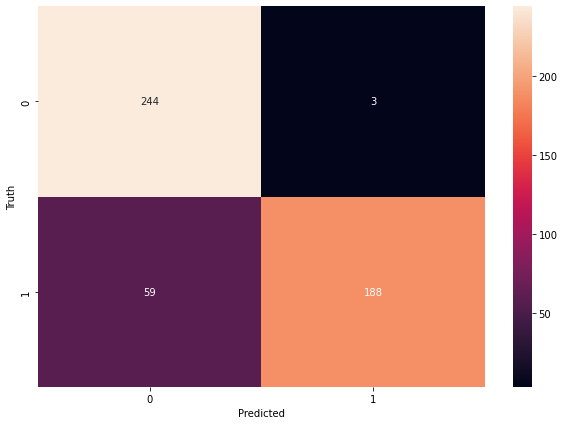

In [28]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

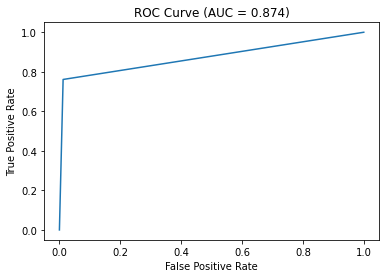

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
auc = roc_auc_score(y_test, y_preds)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.3f})'.format(auc))
plt.show()